# Confidence intervals in Python

## Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(9,6)})

## Generate population data

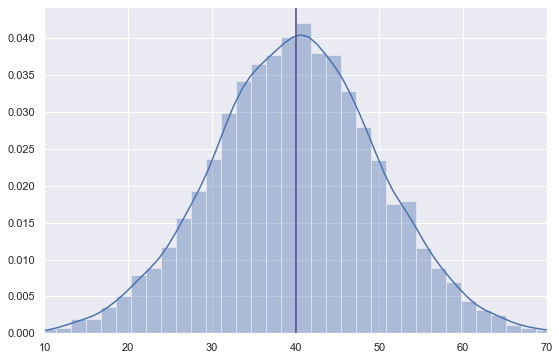

In [2]:
# Generate normal distributed data
np.random.seed(222)
df = pd.DataFrame({'value': np.random.normal(loc=40, scale=10, size=10000)})

# Plot histogram and mean (in green)
sns.distplot(df);
plt.xlim(10, 70)
plt.axvline(df.mean()[0], color='darkslateblue');

In [3]:
# Check actual mean and standard deviation
df.describe().head(3)

,value
count,10000.000000
mean,40.015843
std,9.936291


## Generate sample 

In [4]:
# Random sample
sample_df = pd.DataFrame(np.random.choice(df['value'], 50))

# Plot sample distribution
sample_df.describe().head(3)

,0
count,50.000000
mean,41.321748
std,9.948352


## Calculate confidence interval

The confidence interval formula is:
$$\bar{x}\pm z*\frac{\sigma}{\sqrt{n}}$$

where:  
$\bar{x}$ is the sample mean  
$z$ is the [z-score](https://en.wikipedia.org/wiki/Standard_score)  
$\sigma$ is the sample standard deviation  
$n$ is the sample size  

In [5]:
# Calculate confidence interval
x_bar = sample_df.mean()[0] # Sample mean
sigma = sample_df.std()[0]  # Standard deviation
n = len(sample_df)          # Sample size
z_score = 1.96              # Z-score for 95% two-sided interval

ci = [x_bar - z_score * sigma / np.sqrt(n), x_bar + z_score * sigma / np.sqrt(n)]
ci

[38.564205758105565, 44.07929074221945]

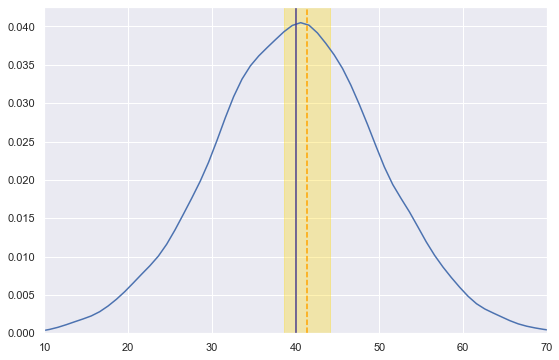

In [6]:
# Plot histogram and true population mean
sns.distplot(df, hist=False);
plt.xlim(10, 70)
plt.axvline(df.mean()[0], color='darkslateblue')

# Plot sample mean and confidence interval
plt.axvline(x_bar, color='orange', linestyle='--')
plt.axvspan(ci[0], ci[1], alpha=0.3, color='gold');

The plot above shows the population actual distribution with a mean of 40.01, as well as the sample mean (41.32) and a 95% confidence interval of [38.56, 44.08].